# <center>Análisis Predictivo para una Tienda<center>

Desarrollar un modelo predictivo para una tienda minorista que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recolectando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la gestión de inventario, promociones y programación del personal

1. Preparación de datos
    - Cargar conjunto de datos
    - Preprocesamiento (Valores faltantes, variables dependientes e independientes, dividir datos en conjunto de entrenmiento y prueba)
2. Análisis exploratorio (EDA)
    - Distribución de las ventas y releación entre ventas y otras características
    - Trazar ventas a lo largo del tiempo, analizar ventas en festivos vs no festivos, impacto de las promociones
3. Selección de Modelo
    - Regresión lineal, Arboles de decisión o Bosques aleatorios
4. Entrenamiento y evaluación del modelo
5. Gráficos para visualizar ventas reales vs ventas predichas
6. Conclusiones

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Divide el dataset en dos partes (train y test)
from sklearn.preprocessing import MinMaxScaler # Escala los datos entre 0 y 1
from sklearn.linear_model import LinearRegression, LogisticRegression # Regresión lineal y logística
from sklearn.tree import DecisionTreeClassifier # Árbol de decisión
from sklearn.ensemble import RandomForestClassifier # Random Forest

### Preparación de datos

In [50]:
df = pd.read_csv('../Python para Data Science/Datasets/Ventas.csv')
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [52]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [53]:
df.isnull().sum()

Fecha            0
DíaDeLaSemana    0
Promociones      0
Festivo          0
Ventas           0
dtype: int64

In [54]:
# Escalar datos
escala = MinMaxScaler(feature_range=(0,1)) # Escala los datos entre 0 y 1

normalizado = escala.fit_transform(df.drop(['Fecha', 'Ventas'], axis=1)) # Normaliza los datos
df_normalizado = pd.DataFrame(normalizado, columns=df.drop(['Fecha', 'Ventas'], axis=1).columns) # Crea un dataframe con los datos normalizados

df_normalizado["Fecha"] = df["Fecha"]
df_normalizado["Ventas"] = df["Ventas"]

df_normalizado.head()

,DíaDeLaSemana,Promociones,Festivo,Fecha,Ventas
0,0.833333,0.0,0.0,2022-01-01,4033
1,1.000000,0.0,1.0,2022-01-02,4012
2,0.000000,0.0,0.0,2022-01-03,1608
3,0.166667,1.0,0.0,2022-01-04,2046
4,0.333333,0.0,0.0,2022-01-05,2484


In [55]:
# Identificar variables dependientes e independientes
X = df_normalizado.drop(['Fecha', 'Ventas'], axis=1)
y = df_normalizado['Ventas']

In [56]:
# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

### Análisis Exploratorio (EDA)

In [57]:
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


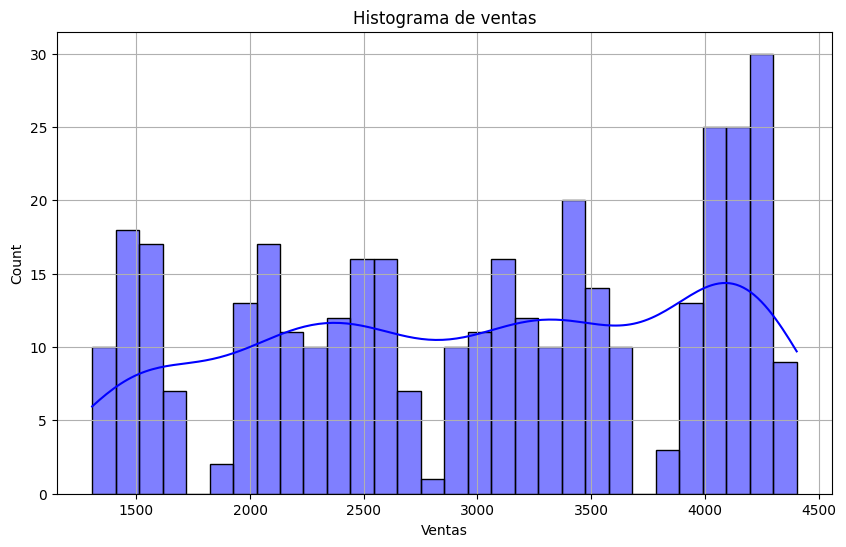

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ventas'], bins=30, color='blue', kde=True)
plt.title('Histograma de ventas')
plt.grid()
plt.show()

/var/folders/ph/kk5ffp952hx0h94c23f3_n7r0000gn/T/ipykernel_65692/3153647830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DíaDeLaSemana', y='Ventas', data=df, palette='viridis')


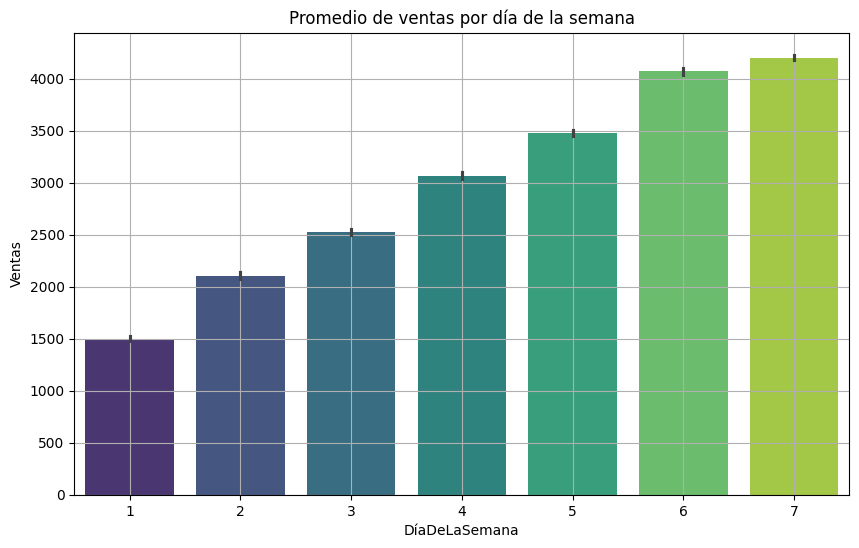

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DíaDeLaSemana', y='Ventas', data=df, palette='viridis')
plt.title('Promedio de ventas por día de la semana')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Ventas con promociones y festivo')

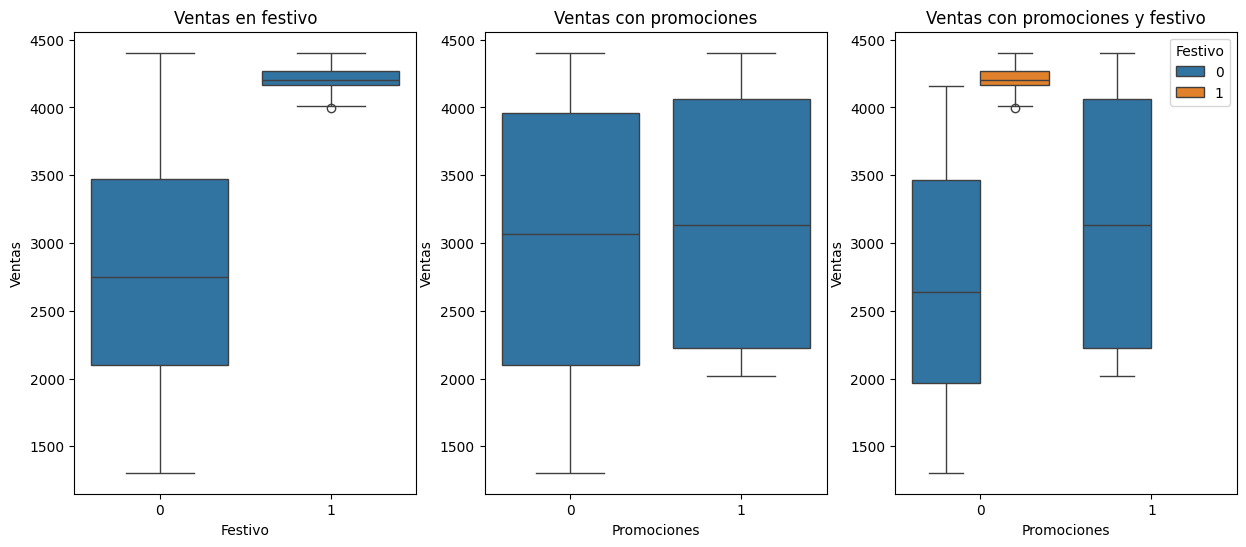

In [60]:
# Ventas en festivo y no festivo
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

sns.boxplot(x='Festivo', y='Ventas', data=df, ax=ax[0])
ax[0].set_title('Ventas en festivo')

sns.boxplot(x='Promociones', y='Ventas', data=df, ax=ax[1])
ax[1].set_title('Ventas con promociones')

sns.boxplot(x='Promociones', y='Ventas', hue='Festivo', data=df, ax=ax[2])
ax[2].set_title('Ventas con promociones y festivo')

### Selección del modelo

In [70]:
modelos = [
    ('modelo linear', LinearRegression()),
    ('modelo arbol', DecisionTreeClassifier()),
    ('modelo bosque', RandomForestClassifier())
]

In [72]:
# Entrenar modelos y mostrar puntajes
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    print(f'{nombre} puntaje: {modelo.score(X_test, y_test)}')

modelo linear puntaje: 0.9889368412917072
modelo arbol puntaje: 0.003424657534246575
modelo bosque puntaje: 0.003424657534246575


### Entrenamiento y evaluación del modelo

In [73]:
modelo_lineal = LinearRegression()

modelo_lineal.fit(X_train, y_train)

predicciones = modelo_lineal.predict(X_test)

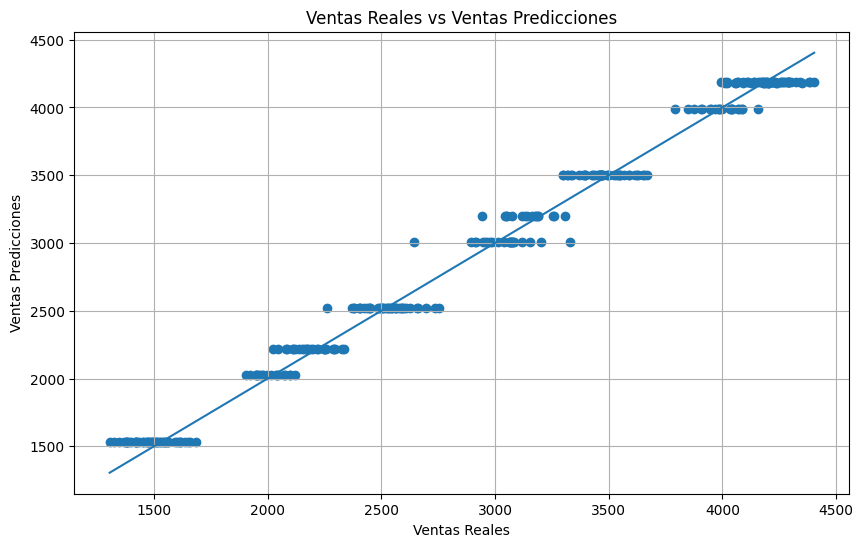

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predicciones')
plt.title('Ventas Reales vs Ventas Predicciones')
plt.grid()
plt.show()

In [77]:
df_test = pd.DataFrame({'Ventas Reales': y_test, 'Ventas Predicciones': predicciones})
df_test = df_test.sort_index()

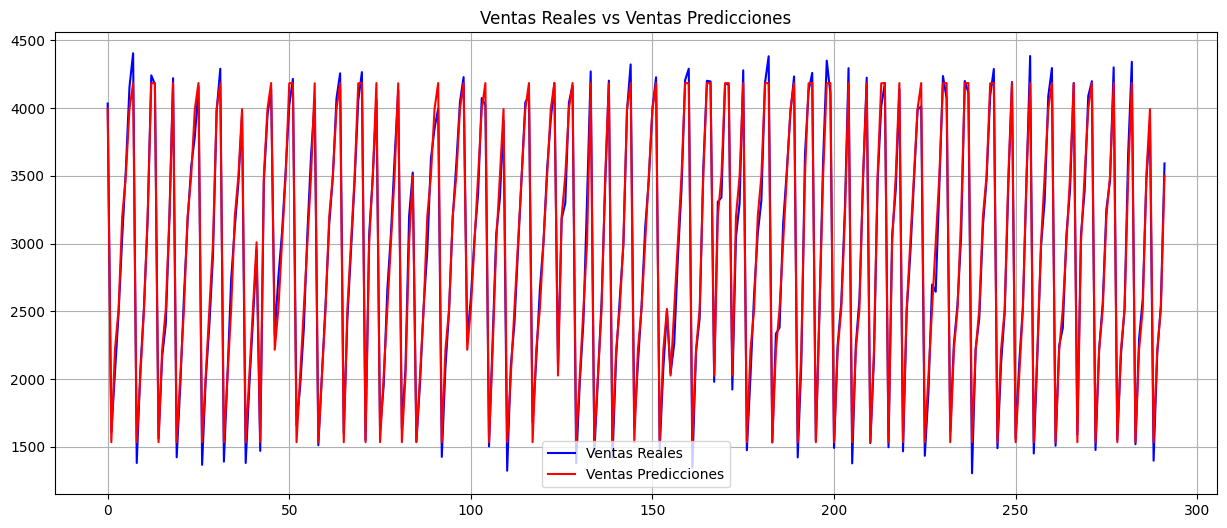

In [88]:
# Comparación entre ventas reales y predicciones a lo largo del tiempo
plt.figure(figsize=(15, 6))
plt.plot(df_test['Ventas Reales'].values, label='Ventas Reales', color='blue')
plt.plot(df_test['Ventas Predicciones'].values, label='Ventas Predicciones', color='red')
plt.title('Ventas Reales vs Ventas Predicciones')
plt.legend(loc='lower center')
plt.grid()
plt.show()

### Conclusiones

1. En el gráfico de Ventas Reales vs Ventras Predicciones se puede observar que el modelo de regresión lineal fue el ideal para la predicción de las ventas. La línea de tendencia permite evidenciar una buena relación entre los valores reales y los predecidos

2. En el segundo gráfico, al comparar las Ventas Reales y Ventas Predicciones a lo largo del tiempo, se puede observar un valor muy similar. Se observan algunos puntos donde hay una diferencia significativa, pero esto se presenta debido a eventos no capturados por las variables o a variaciones naturales que no son predecibles